In [ ]:
pip install matplotlib

In [ ]:
pip install pandas

In [12]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from datetime import date

In [6]:
data= pd.read_csv("cases_all_states.csv") #cases/day data 
dat= pd.read_csv("cleaned_all_states_data.csv") #political factor data 

In [7]:
fips_to_trumpvote_dict= {}
for row in dat.itertuples():         
    fips_to_trumpvote_dict[row.FIPS] = row.trump_vote_over_50

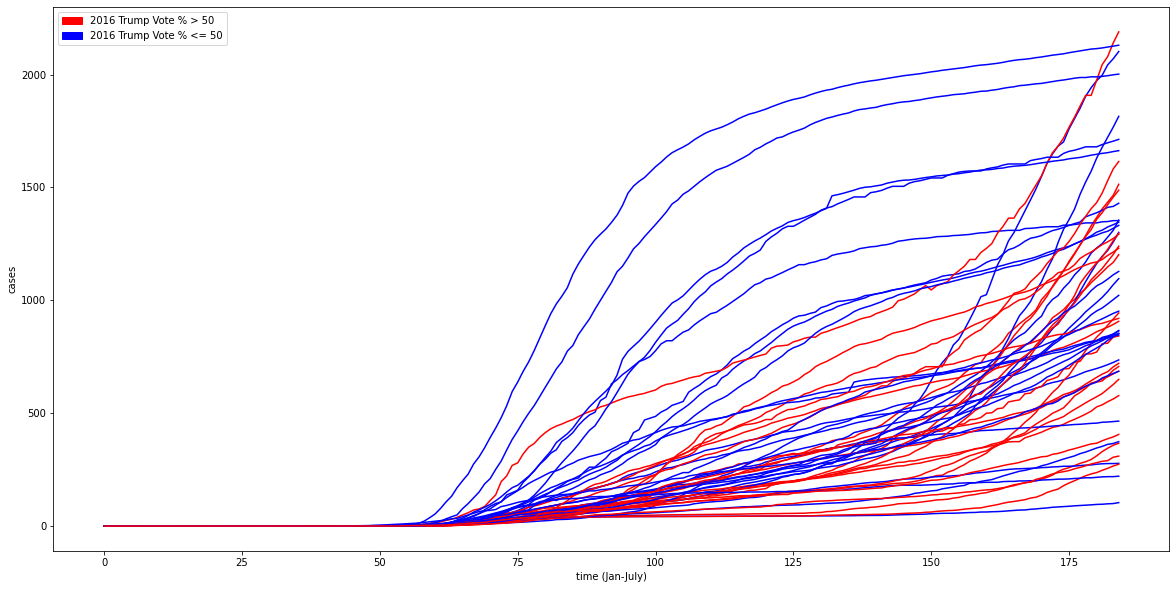

In [8]:
color_picker= ['blue','red']
plt.figure(figsize=(20,10))
plt.xlabel('time (Jan-July)')
plt.ylabel('cases')
red_patch = mpatches.Patch(color='red', label='2016 Trump Vote % > 50')
blue_patch = mpatches.Patch(color='blue', label='2016 Trump Vote % <= 50')
plt.legend(handles=[red_patch,blue_patch])

for statefip in fips_to_trumpvote_dict.keys(): 
    cr=[]
    for row in data.itertuples():     
        if row.statefips == statefip:
            cr.append(row.case_rate)
            trmpvte= fips_to_trumpvote_dict[statefip]
    plt.plot(cr, color=color_picker[trmpvte])
plt.show()



In [10]:
clean= pd.read_csv("cleaned_all_states_data_sort.csv")
cut= clean[['stay_home_start_date', 'FIPS']][0:41] #only use states w/ Stay @ home orders listed 


In [11]:
SAH= []
for i in range(0,41):
    r= cut['stay_home_start_date'][i].split("/")[0:2]
    r.append('2020')
    r.append(cut['FIPS'][i])
    SAH.append(r)

In [15]:
df = pd.DataFrame(SAH, columns = ['Month' ,'Day', 'Year', 'FIPS']) 

In [17]:
#find dates for shifting 
df_2= []
for j in range(0,41): 
    f_date = date(2020, 1, 21) #first day in data 
    l_date = date(int(df["Year"][j]), int(df["Month"][j]), int(df["Day"][j]))
    delta = l_date - f_date    
    e_date= date(2020, 7, 23) #last day in data 
    delta2= e_date-l_date
    df_2.append([delta.days, delta2.days])
    
df_2 = pd.DataFrame(df_2, columns = ["Day Difference Neg", "Day Difference Pos" ]) 

In [18]:
fin_dat= pd.concat([df, df_2], axis=1) 

In [20]:
print(fin_dat.head()) #should look like Month, Day, Year, FIPS, Day Diff Neg, Day Diff Pos

  Month Day  Year  FIPS  Day Difference Neg  Day Difference Pos
0     3  19  2020     6                  58                 126
1     3  21  2020    17                  60                 124
2     3  21  2020    34                  60                 124
3     3  22  2020    36                  61                 123
4     3  23  2020    22                  62                 122


In [21]:
#some helper functions 
def fdl(a,b): 
    array=[]
    for y in (range(-a, b+1)):
        array.append(y)
    return (array)

def find_cases(i, data): 
    fips= fin_dat["FIPS"][i]
    cases=[]
    for row in data.itertuples():
        if row.statefips == fips: 
            cases.append(row.case_rate)
            trmpvte= fips_to_trumpvote_dict[fips]
    return cases # should give array 

In [22]:
master_df=pd.DataFrame()
for i in range(0,41): 
    find_day_list = fdl(fin_dat["Day Difference Neg"][i], fin_dat["Day Difference Pos"][i])
    cases_= find_cases(i, data)
    fips= fin_dat["FIPS"][i]
    df_temp =pd.DataFrame({
    str(fips)+ "_days": find_day_list,
    str(fips) + "_cases": cases_ })
    master_df= pd.concat([master_df, df_temp], axis=1) 

In [23]:
master_df.head() 
#so this formatting is weird I'll give you that but the number in the title corresponds 
#to the FIPS 



,6_days,6_cases,17_days,17_cases,34_days,34_cases,36_days,36_cases,22_days,22_cases,...,13_days,13_cases,28_days,28_cases,1_days,1_cases,29_days,29_cases,45_days,45_cases
0,-58,0.00000,-60,0.00000,-60,0.0,-61,0.0,-62,0.0,...,-73,0.0,-73,0.0,-74,0.0,-76,0.0,-77,0.0
1,-57,0.00000,-59,0.00000,-59,0.0,-60,0.0,-61,0.0,...,-72,0.0,-72,0.0,-73,0.0,-75,0.0,-76,0.0
2,-56,0.00000,-58,0.00000,-58,0.0,-59,0.0,-60,0.0,...,-71,0.0,-71,0.0,-72,0.0,-74,0.0,-75,0.0
3,-55,0.00000,-57,0.00789,-57,0.0,-58,0.0,-59,0.0,...,-70,0.0,-70,0.0,-71,0.0,-73,0.0,-74,0.0
4,-54,0.00253,-56,0.00789,-56,0.0,-57,0.0,-58,0.0,...,-69,0.0,-69,0.0,-70,0.0,-72,0.0,-73,0.0


In [28]:
#have to remove states that do not have listed SAH orders
fips_to_trumpvote_dict_short= {}
for row in dat.itertuples():         
    fips_to_trumpvote_dict_short[row.FIPS] = row.trump_vote_over_50
remove= [5, 9, 19, 21, 31, 38, 40, 46, 49] 
for j in range(0,len(remove)): 
    fips_to_trumpvote_dict_short.pop(remove[j])

In [29]:
fips_to_pop= {}
for row in dat.itertuples():         
    fips_to_pop[row.FIPS] = row.population
remove= [5, 9, 19, 21, 31, 38, 40, 46, 49] 
for j in range(0,len(remove)): 
    fips_to_pop.pop(remove[j])

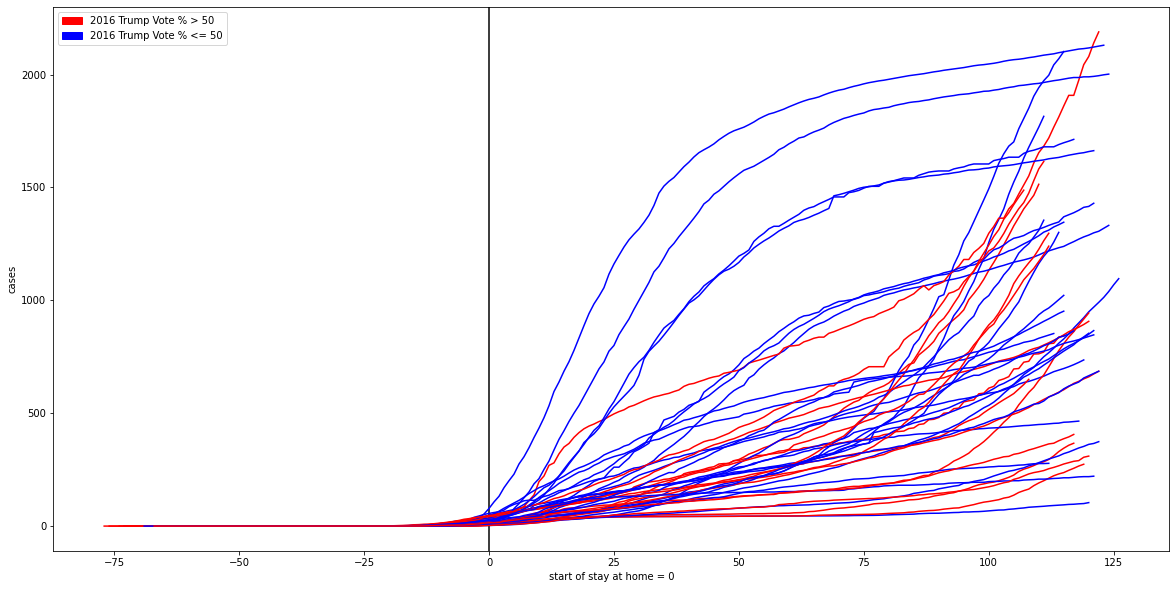

In [30]:
#shifted plots
color_picker= ['blue','red']
plt.figure(figsize=(20,10))
plt.xlabel('start of stay at home = 0')
plt.ylabel('cases')

red_patch = mpatches.Patch(color='red', label='2016 Trump Vote % > 50')
blue_patch = mpatches.Patch(color='blue', label='2016 Trump Vote % <= 50')
plt.legend(handles=[red_patch,blue_patch])
plt.axvline(0, color= "black")
for statefip in fips_to_trumpvote_dict_short.keys(): 
    day= str(statefip)+ "_days"
    cas= str(statefip)+ "_cases"
    trmpvte= fips_to_trumpvote_dict_short[statefip]
    plt.plot(master_df[day],master_df[cas], color = color_picker[trmpvte] )
plt.show()


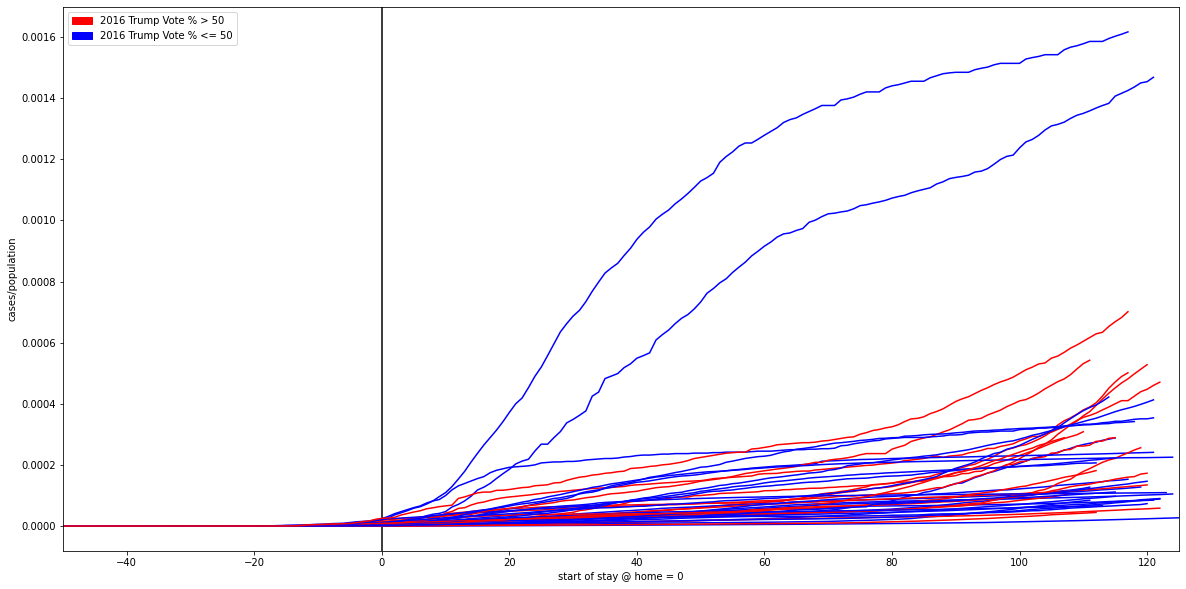

In [31]:
#normalized based on population
color_picker= ['blue','red']
plt.figure(figsize=(20,10))
plt.xlabel('start of stay @ home = 0')
plt.ylabel('cases/population')
plt.xlim([-50, 125])
#plt.ylim([0, .00000999])
red_patch = mpatches.Patch(color='red', label='2016 Trump Vote % > 50')
blue_patch = mpatches.Patch(color='blue', label='2016 Trump Vote % <= 50')
plt.legend(handles=[red_patch,blue_patch])
plt.axvline(0, color= "black")
for statefip in fips_to_trumpvote_dict_short.keys(): 
    day= str(statefip)+ "_days"
    cas= str(statefip)+ "_cases"
    trmpvte= fips_to_trumpvote_dict_short[statefip]
    pop= fips_to_pop[statefip]
    plt.plot(master_df[day],master_df[cas]/pop, color = color_picker[trmpvte] )
plt.show()

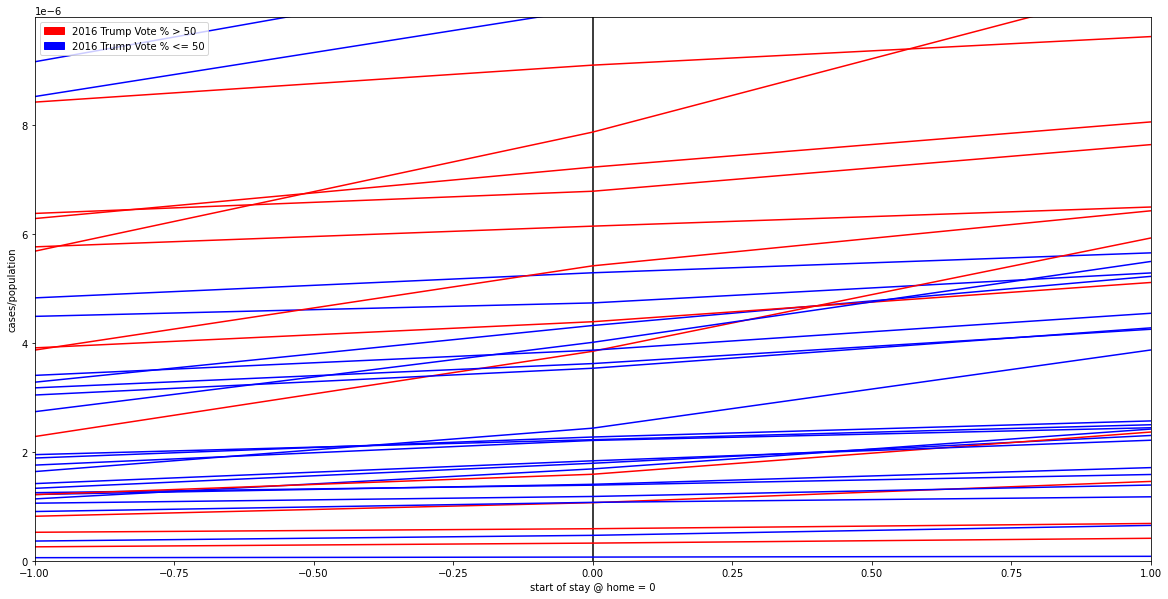

In [32]:
#zoomed in
color_picker= ['blue','red']
plt.figure(figsize=(20,10))
plt.xlabel('start of stay @ home = 0')
plt.ylabel('cases/population')
plt.xlim([-1, 1])
plt.ylim([0, .00000999])

red_patch = mpatches.Patch(color='red', label='2016 Trump Vote % > 50')
blue_patch = mpatches.Patch(color='blue', label='2016 Trump Vote % <= 50')
plt.legend(handles=[red_patch,blue_patch])
plt.axvline(0, color= "black")
for statefip in fips_to_trumpvote_dict_short.keys(): 
    day= str(statefip)+ "_days"
    cas= str(statefip)+ "_cases"
    trmpvte= fips_to_trumpvote_dict_short[statefip]
    pop= fips_to_pop[statefip]
    plt.plot(master_df[day],master_df[cas]/pop, color = color_picker[trmpvte] )
plt.show()